# Final Project

Analysis Summary

In this analysis I analyzed tweets by two different electric guitar brands. Fender guitar and Gibson guitars. In this analysis I Used Twitter API to collect the Data. I perform some text analysis including word clouds and word frequency. I then performed sentiment analysis on both sets of twitter data. This is to determine the tone of each company on and thier social media presence. I included a graph of the sentiment scores so that you can visualize the distrubtion of scores. This could be used by a manager to understand how they are coming across on twitter to their customers compared to other brands. I then moved on topic modeling. I developed a model for each brand which catogorizes tweets into a handful of topics. This can be used managers to better understand their social media presence and to categorize topics and understand maybe what topics that could be focused on more or less. I then moved on to a hashtag network analysis so this could be used to understand what hashtags are being maentioned together and what things that the brands are promoting are linked to each other. Overall there are many mangerial perpectives that can be drawn from my analysis.

In [3]:
import csv
import pandas as pd
import re
import json
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import pandas as pd

import seaborn as sns
import scipy.stats as stats
from scipy import stats
from pandas.tools import plotting

import nltk
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
#csv
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Data Collection

In [4]:
df = pd.read_csv("data/sample_tweetsgibsong.csv")
df.head(10)

,handle,time,tweet
0,gibsonguitar,5/7/2019 14:52,A Modern Les Paul for every player. #gibson #t...
1,gibsonguitar,5/6/2019 14:37,Be Relevant with Gibson’s Modern Collection. #...
2,gibsonguitar,5/5/2019 22:07,@BillyFGibbons of @ZZTop stopped by to try out...
3,gibsonguitar,5/4/2019 4:44,@BillyFGibbons of @ZZTop stopped by to try out...
4,gibsonguitar,5/3/2019 15:05,The Les Paul Standard 50's has a solid mahogan...
5,gibsonguitar,5/2/2019 19:46,Dive into the new Les Paul Standard ‘50s with ...
6,gibsonguitar,5/2/2019 15:25,A Classic Reborn. The new Les Paul Standard ‘5...
7,gibsonguitar,5/1/2019 22:10,The new Les Paul Junior Tobacco Burst and Les ...
8,gibsonguitar,5/1/2019 15:16,Want to win a Les Paul Standard 60’s from the ...
9,gibsonguitar,4/30/2019 23:09,1961 was just the beginning for the Gibson SG ...


In [5]:
dff = pd.read_csv("data/sample_tweetsfender.csv")
dff.head(10)

,handle,time,tweets
0,Fender,5/7/2019 18:04,The Duff McKagan Deluxe Precision Bass was ins...
1,Fender,5/6/2019 22:19,@RibeiroR72 We announced the winners last week...
2,Fender,5/6/2019 21:32,A few great photos from the opening of the Fen...
3,Fender,5/6/2019 21:00,Nothing beats catching a few riffs on a Surf G...
4,Fender,5/6/2019 18:31,RT @rockhall: The Hoss. @muddyofficial preferr...
5,Fender,5/5/2019 16:00,Head to the Fender website to scope out the la...
6,Fender,5/4/2019 16:00,What vibes are you getting from this Surf Gree...
7,Fender,5/4/2019 11:00,"So, who wants to see Mumford &amp; Sons at @al..."
8,Fender,5/3/2019 15:33,Fender at @thegreatescape will be epic and we ...
9,Fender,5/3/2019 15:02,Congrats @individual6827 @guynamedfawkes @Jone...


# Data Processing

In [6]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [7]:
df['cleaned'] = df['tweet']
df['cleaned'] = df['cleaned'].str.replace('http\S+|www.\S+', '')
df['cleaned'] = df['cleaned'].str.replace('\d+', '')
df['cleaned'] = df['cleaned'].str.replace('[^a-zA-Z]+', ' ')
df['cleaned'] = df['cleaned'].str.findall('\w{3,}').str.join(' ')
df['cleaned'] = df['cleaned'].str.replace(r'\b(\w{1,3})\b', '')
df['cleaned'] = df['cleaned'].str.lower()
df['cleaned'] = df['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

df['words'] = df['cleaned'].str.split()
df['words'] = df['words'].apply(', '.join)


In [8]:
dff['cleaned'] = dff['tweets']
dff['cleaned'] = dff['cleaned'].str.replace('http\S+|www.\S+', '')
dff['cleaned'] = dff['cleaned'].str.replace('\d+', '')
dff['cleaned'] = dff['cleaned'].str.replace('[^a-zA-Z]+', ' ')
dff['cleaned'] = dff['cleaned'].str.findall('\w{3,}').str.join(' ')
dff['cleaned'] = dff['cleaned'].str.replace(r'\b(\w{1,3})\b', '')
dff['cleaned'] = dff['cleaned'].str.lower()
dff['cleaned'] = dff['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))


dff['words'] = dff['cleaned'].str.split()
dff['words'] = dff['words'].apply(', '.join)


# Text Analysis

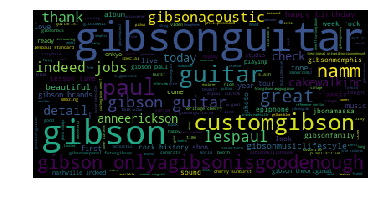

In [9]:
wordcloud = WordCloud().generate(' '.join(df['words']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

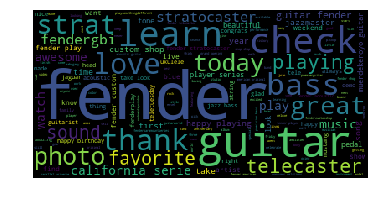

In [10]:
wordcloud = WordCloud().generate(' '.join(dff['words']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [11]:
from collections import Counter

In [12]:
fdist = list(Counter(" ".join(df['cleaned']).split(" ")).items())

# convert to dataframe
freq_word = []

for k,v in fdist:
    freq_word.append([k,v])

wordlist = pd.DataFrame(freq_word)

#
wordlist.sort_values(1, ascending=False).head(20)

,0,1
4,gibson,859
355,gibsonguitar,690
410,lespaul,273
53,guitar,247
245,customgibson,230
1,paul,229
6,onlyagibsonisgoodenough,173
199,namm,142
195,great,132
206,rock,120


In [13]:
fdist = list(Counter(" ".join(dff['cleaned']).split(" ")).items())

# convert to dataframe
freq_word = []

for k,v in fdist:
    freq_word.append([k,v])

wordlist = pd.DataFrame(freq_word)

#
wordlist.sort_values(1, ascending=False).head(20)

,0,1
19,fender,1152
39,guitar,316
90,check,187
240,happy,172
52,series,171
184,learn,167
4,bass,159
201,stratocaster,132
40,telecaster,128
178,playing,126


# Sentiment Analysis

## Vader Sentiment

In [14]:
vs = SentimentIntensityAnalyzer()

In [15]:
df['score'] = df['cleaned'].apply(lambda x: vs.polarity_scores(x)['compound'])
df.head(10)

,handle,time,tweet,cleaned,words,score
0,gibsonguitar,5/7/2019 14:52,A Modern Les Paul for every player. #gibson #t...,modern paul every player gibson theoriginal on...,"modern, paul, every, player, gibson, theorigin...",0.0000
1,gibsonguitar,5/6/2019 14:37,Be Relevant with Gibson’s Modern Collection. #...,relevant gibson modern collection gibson theor...,"relevant, gibson, modern, collection, gibson, ...",0.0000
2,gibsonguitar,5/5/2019 22:07,@BillyFGibbons of @ZZTop stopped by to try out...,billyfgibbons zztop stopped paul goldtop reiss...,"billyfgibbons, zztop, stopped, paul, goldtop, ...",-0.2263
3,gibsonguitar,5/4/2019 4:44,@BillyFGibbons of @ZZTop stopped by to try out...,billyfgibbons zztop stopped paul goldtop reiss...,"billyfgibbons, zztop, stopped, paul, goldtop, ...",-0.2263
4,gibsonguitar,5/3/2019 15:05,The Les Paul Standard 50's has a solid mahogan...,paul standard solid mahogany body maple rounde...,"paul, standard, solid, mahogany, body, maple, ...",0.1531
5,gibsonguitar,5/2/2019 19:46,Dive into the new Les Paul Standard ‘50s with ...,dive paul standard nallecolt vintagetrouble he...,"dive, paul, standard, nallecolt, vintagetroubl...",0.0000
6,gibsonguitar,5/2/2019 15:25,A Classic Reborn. The new Les Paul Standard ‘5...,classic reborn paul standard returns classic d...,"classic, reborn, paul, standard, returns, clas...",0.3400
7,gibsonguitar,5/1/2019 22:10,The new Les Paul Junior Tobacco Burst and Les ...,paul junior tobacco burst paul special yellow ...,"paul, junior, tobacco, burst, paul, special, y...",0.4019
8,gibsonguitar,5/1/2019 15:16,Want to win a Les Paul Standard 60’s from the ...,want paul standard collection follow link chance,"want, paul, standard, collection, follow, link...",0.3182
9,gibsonguitar,4/30/2019 23:09,1961 was just the beginning for the Gibson SG ...,beginning gibson gibson theoriginal onlyagibso...,"beginning, gibson, gibson, theoriginal, onlyag...",0.0000


In [16]:
df["score"].mean()

0.2331147566719001

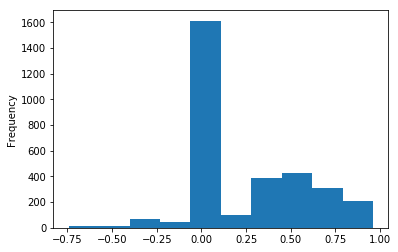

In [17]:
df['score'].plot.hist()

In [18]:
dff['score'] = dff['cleaned'].apply(lambda x: vs.polarity_scores(x)['compound'])
dff.head(10)

,handle,time,tweets,cleaned,words,score
0,Fender,5/7/2019 18:04,The Duff McKagan Deluxe Precision Bass was ins...,duff mckagan deluxe precision bass inspired ja...,"duff, mckagan, deluxe, precision, bass, inspir...",0.8074
1,Fender,5/6/2019 22:19,@RibeiroR72 We announced the winners last week...,ribeiror announced winners last week,"ribeiror, announced, winners, last, week",0.4767
2,Fender,5/6/2019 21:32,A few great photos from the opening of the Fen...,great photos opening fender exhibit museumfull...,"great, photos, opening, fender, exhibit, museu...",0.6249
3,Fender,5/6/2019 21:00,Nothing beats catching a few riffs on a Surf G...,nothing beats catching riffs surf green jaguar...,"nothing, beats, catching, riffs, surf, green, ...",0.3182
4,Fender,5/6/2019 18:31,RT @rockhall: The Hoss. @muddyofficial preferr...,rockhall hoss muddyofficial preferred guitar f...,"rockhall, hoss, muddyofficial, preferred, guit...",0.4215
5,Fender,5/5/2019 16:00,Head to the Fender website to scope out the la...,head fender website scope latest additions cal...,"head, fender, website, scope, latest, addition...",0.0000
6,Fender,5/4/2019 16:00,What vibes are you getting from this Surf Gree...,vibes getting surf green squier classic vibe j...,"vibes, getting, surf, green, squier, classic, ...",0.0000
7,Fender,5/4/2019 11:00,"So, who wants to see Mumford &amp; Sons at @al...",wants mumford sons allpointseastuk june talkin...,"wants, mumford, sons, allpointseastuk, june, t...",0.0000
8,Fender,5/3/2019 15:33,Fender at @thegreatescape will be epic and we ...,fender thegreatescape epic wait next week market,"fender, thegreatescape, epic, wait, next, week...",0.0000
9,Fender,5/3/2019 15:02,Congrats @individual6827 @guynamedfawkes @Jone...,congrats individual guynamedfawkes jonesdan de...,"congrats, individual, guynamedfawkes, jonesdan...",0.6908


In [19]:
dff["score"].mean()

0.2644461181565117

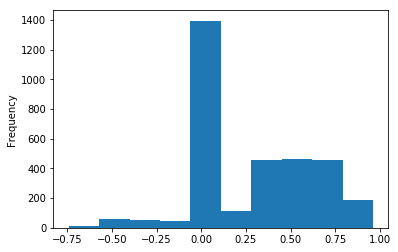

In [20]:
dff['score'].plot.hist()

# Topic Modeling

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re

import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim import corpora, models, similarities

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

import numpy
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

In [22]:
len(df)

3185

In [23]:
len(dff)

3233

In [24]:
df1= df.head(2000)

In [25]:
dff1= dff.head(2000)

In [26]:
df1 = df1['cleaned']
df1.head(1)

0    modern paul every player gibson theoriginal on...
Name: cleaned, dtype: object

In [27]:
dff1 = dff1['cleaned']
dff1.head(1)

0    duff mckagan deluxe precision bass inspired ja...
Name: cleaned, dtype: object

In [28]:
texts = df1.values
len(texts)

2000

In [29]:
for i in texts[:2]:
    print(i)

modern paul every player gibson theoriginal onlyagibsonisgoodenough
relevant gibson modern collection gibson theoriginal onlyagibsonisgoodenough


In [30]:
# Remove useless numbers and alphanumerical words
documents = [ re.sub("[^a-zA-Z0-9]", " ", document) for document in texts]

# tokenize
texts = [  document.lower().split() for document in documents ]

# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts = [ [ lmtzr.lemmatize(word) for word in tokens   ]  for tokens in texts     ]

#porter_stemmer = PorterStemmer()
#texts = [[porter_stemmer.stem(word) for word in text ] for text in texts]

# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in tokens if word not in stoplist ] for tokens in texts]

#remove short words
texts = [[word for word in tokens if len(word) >= 3] for tokens in texts]

In [31]:
dictionary = Dictionary(texts)
dictionary.save('data/gibson.dict')  # store the dictionary, for future reference

len(dictionary)

3495

In [32]:
## Remove rare and common tokens.
# ignore words that appear in less than 5 documents or more than 50% documents (remove too frequent & infrequent words) - an optional step
dictionary.filter_extremes(no_below=5, no_above=0.5) #https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes
len(dictionary)

553

In [33]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('data/gibson.mm', corpus)  # store to disk, for later use  # store to disk, for later use
len(corpus)

2000

In [34]:
print(('Number of unique tokens: %d' % len(dictionary)))
print(('Number of documents: %d' % len(corpus)))

Number of unique tokens: 553
Number of documents: 2000


In [35]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

# setting random seed to get the same results each time. Remove this line for HW
numpy.random.seed(1)
for k in range(2, 10):
    goodLdaModel = ldamodel.LdaModel(
        corpus=corpus, id2word=dictionary, num_topics=k, passes=50)
    goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus,
                            dictionary=dictionary, coherence='u_mass')
    print(goodcm.get_coherence())

-13.232288169875247
-11.856437357582765
-11.064105844002643
-12.502006339803833
-12.301279980807855
-12.830657362712532
-13.280757004694166
-12.817437952017512


In [36]:
numpy.random.seed(1)
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=12,passes= 20)
                                    

In [37]:
model.save('data/lda.model')

In [38]:
model.show_topics(num_topics=12)

[(0,
  '0.091*"rock" + 0.074*"week" + 0.063*"history" + 0.048*"time" + 0.043*"lespaul" + 0.042*"cherry" + 0.037*"sunburst" + 0.036*"vintage" + 0.033*"true" + 0.032*"historic"'),
 (1,
  '0.083*"birthday" + 0.083*"happy" + 0.065*"cakewalkinc" + 0.057*"photo" + 0.041*"sonar" + 0.039*"gibsonguitar" + 0.024*"show" + 0.023*"night" + 0.023*"ctdags" + 0.021*"last"'),
 (2,
  '0.064*"gibson" + 0.054*"love" + 0.049*"gibsonguitar" + 0.044*"play" + 0.036*"special" + 0.028*"link" + 0.025*"paul" + 0.024*"flying" + 0.024*"gibsontrixinparty" + 0.021*"check"'),
 (3,
  '0.072*"gibson" + 0.045*"gibsonguitar" + 0.039*"musikmesse" + 0.035*"acoustic" + 0.031*"slash" + 0.029*"world" + 0.025*"model" + 0.025*"vidcon" + 0.025*"john" + 0.023*"guitar"'),
 (4,
  '0.157*"gibson" + 0.135*"guitar" + 0.051*"nashville" + 0.042*"job" + 0.042*"indeed" + 0.040*"brand" + 0.027*"great" + 0.022*"come" + 0.020*"guitarcenter" + 0.017*"gibsonguitar"'),
 (5,
  '0.330*"gibson" + 0.180*"onlyagibsonisgoodenough" + 0.053*"theoriginal

In [39]:
lda_corpus = model[corpus]

results = []
for i in lda_corpus:
    
    results.append(i)


In [40]:
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]
toptopic[:5]

[5, 5, 9, 9, 1]

In [41]:
toptopic = pd.DataFrame(toptopic)
documents = pd.DataFrame(documents)
documents = documents.rename(columns={0: 'documents'})
summary = documents.join(toptopic)
summary.head()

,documents,0
0,modern paul every player gibson theoriginal on...,5
1,relevant gibson modern collection gibson theor...,5
2,billyfgibbons zztop stopped paul goldtop reiss...,9
3,billyfgibbons zztop stopped paul goldtop reiss...,9
4,paul standard solid mahogany body maple rounde...,1


In [42]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.210149  0.149664       1        1  10.670516
8      0.259428  0.093604       2        1   9.771063
5     -0.189094  0.148962       3        1   9.126438
10    -0.068567  0.035392       4        1   9.107820
11    -0.081481 -0.092639       5        1   8.415609
0      0.242728  0.145631       6        1   8.408726
3     -0.080007  0.004388       7        1   7.991655
7      0.113684  0.034895       8        1   7.845945
9      0.124350 -0.086167       9        1   7.461240
1     -0.011088 -0.272282      10        1   7.367290
6      0.022482 -0.143657      11        1   7.223465
2     -0.122288 -0.017791      12        1   6.610240, topic_info=     Category        Freq                     Term       Total  loglift  \
term                                                                      
1     Default  615.000000                   gibson  615.000000  30.0000   
3     Default  157.000000  onlyagibsonisgoodenough  157.000000  29.0000   
38    Default  173.000000                   guitar  173.000000  28.0000   
126   Default  135.000000             customgibson  135.000000  27.0000   
172   Default  189.000000                  lespaul  189.000000  26.0000   
382   Default   84.000000              gibsonquest   84.000000  25.0000   
108   Default  103.000000                     rock  103.000000  24.0000   
165   Default  278.000000             gibsonguitar  278.000000  23.0000   
161   Default   74.000000                 birthday   74.000000  22.0000   
107   Default   68.000000                    happy   68.000000  21.0000   
80    Default   59.000000                     week   59.000000  20.0000   
131   Default   52.000000                     live   52.000000  19.0000   
320   Default   51.000000                  history   51.000000  18.0000   
384   Default   53.000000                     clue   53.000000  17.0000   
21    Default   56.000000                  classic   56.000000  16.0000   
449   Default   46.000000              cakewalkinc   46.000000  15.0000   
53    Default   74.000000                   custom   74.000000  14.0000   
136   Default   48.000000                   winner   48.000000  13.0000   
6     Default   47.000000              theoriginal   47.000000  12.0000   
299   Default   45.000000                   pickup   45.000000  11.0000   
61    Default   71.000000                nashville   71.000000  10.0000   
220   Default   53.000000                    photo   53.000000   9.0000   
444   Default   44.000000                   oneoff   44.000000   8.0000   
223   Default   42.000000                 congrats   42.000000   7.0000   
18    Default   62.000000                 standard   62.000000   6.0000   
456   Default   43.000000                      job   43.000000   5.0000   
455   Default   43.000000                   indeed   43.000000   4.0000   
152   Default   34.000000                     love   34.000000   3.0000   
253   Default   49.000000                  vintage   49.000000   2.0000   
283   Default   47.000000                     time   47.000000   1.0000   
...       ...         ...                      ...         ...      ...   
509   Topic12    9.781429           trixinclothing   11.754950   2.5328   
325   Topic12    9.628180                     many   11.742512   2.5180   
134   Topic12   13.244758                   little   16.628868   2.4890   
517   Topic12    6.804602            gibsongermany    8.791133   2.4604   
151   Topic12    5.004037              guitarworld    6.806314   2.4089   
178   Topic12   10.482822                     line   14.569496   2.3874   
309   Topic12   10.160325                  cmafest   16.393711   2.2381   
10    Topic12   11.056639                     head   18.524572   2.2005   
116   Topic12    5.729329                     work    9.676190   2.1925   
324   Topic12    4.242033                     fact 

In [44]:
texts1 = dff1.values
len(texts1)

2000

In [45]:
for i in texts1[:2]:
    print(i)

duff mckagan deluxe precision bass inspired jazz bass special played gunsnroses appetite
ribeiror announced winners last week


In [46]:
documents = [ re.sub("[^a-zA-Z0-9]", " ", document) for document in texts1]

# tokenize
texts1 = [  document.lower().split() for document in documents ]

# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts1 = [ [ lmtzr.lemmatize(word) for word in tokens   ]  for tokens in texts1     ]

#porter_stemmer = PorterStemmer()
#texts = [[porter_stemmer.stem(word) for word in text ] for text in texts]

# remove common words 
stoplist = stopwords.words('english')
texts1 = [[word for word in tokens if word not in stoplist ] for tokens in texts1]

#remove short words
texts1 = [[word for word in tokens if len(word) >= 3] for tokens in texts1]

In [47]:
dictionary = Dictionary(texts1)
dictionary.save('data/fender.dict')  # store the dictionary, for future reference

len(dictionary)

3671

In [48]:
dictionary.filter_extremes(no_below=5, no_above=0.5) #https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes
len(dictionary)

502

In [49]:
corpus = [dictionary.doc2bow(text) for text in texts1]
corpora.MmCorpus.serialize('data/fender.mm', corpus)  # store to disk, for later use  # store to disk, for later use
len(corpus)

2000

In [50]:
print(('Number of unique tokens: %d' % len(dictionary)))
print(('Number of documents: %d' % len(corpus)))

Number of unique tokens: 502
Number of documents: 2000


In [51]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

# setting random seed to get the same results each time. Remove this line for HW
numpy.random.seed(1)
for k in range(2, 10):
    goodLdaModel = ldamodel.LdaModel(
        corpus=corpus, id2word=dictionary, num_topics=k, passes=50)
    goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus,
                            dictionary=dictionary, coherence='u_mass')
    print(goodcm.get_coherence())

-8.62345774874652
-10.461055851560067
-11.217626967403946
-11.791381971038364
-12.785678237227529
-11.69996286194671
-12.140470190389857
-11.948587779511616


In [52]:
numpy.random.seed(1)
modelf = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10,passes= 20)
                                    

In [53]:
modelf.show_topics(num_topics=12)

[(0,
  '0.092*"fender" + 0.075*"bass" + 0.069*"guitar" + 0.043*"muerdekeroyo" + 0.042*"custom" + 0.033*"shop" + 0.023*"jazz" + 0.022*"stratocaster" + 0.021*"precision" + 0.020*"beautiful"'),
 (1,
  '0.058*"fender" + 0.058*"great" + 0.048*"bass" + 0.030*"sound" + 0.025*"good" + 0.021*"looking" + 0.020*"fenderplay" + 0.019*"signature" + 0.019*"play" + 0.018*"time"'),
 (2,
  '0.070*"fender" + 0.049*"favorite" + 0.038*"else" + 0.038*"week" + 0.037*"guitar" + 0.026*"year" + 0.026*"photo" + 0.023*"learn" + 0.019*"song" + 0.017*"anyone"'),
 (3,
  '0.070*"series" + 0.053*"acoustic" + 0.041*"guitar" + 0.039*"player" + 0.036*"california" + 0.033*"learn" + 0.026*"squier" + 0.025*"fendergbi" + 0.022*"fender" + 0.022*"jaguar"'),
 (4,
  '0.079*"take" + 0.061*"fender" + 0.058*"look" + 0.043*"mustang" + 0.042*"thanks" + 0.031*"learn" + 0.027*"check" + 0.018*"reverb" + 0.017*"amplifier" + 0.017*"pick"'),
 (5,
  '0.093*"playing" + 0.049*"fender" + 0.038*"happy" + 0.033*"best" + 0.030*"hear" + 0.027*"hel

In [54]:
lda_corpus = modelf[corpus]

results = []
for i in lda_corpus:
    
    results.append(i)


In [55]:
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]
toptopic[:5]

[0, 2, 2, 7, 8]

In [56]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(modelf, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.030827  0.002059       1        1  11.401137
3     -0.248054 -0.002103       2        1  11.211929
8      0.091951  0.003555       3        1  11.189762
1      0.089422  0.124004       4        1   9.881763
6      0.155488 -0.135121       5        1   9.834600
2     -0.165816 -0.058505       6        1   9.544616
4      0.049087  0.177260       7        1   9.501183
9     -0.006153  0.130243       8        1   9.234236
5      0.046943 -0.211166       9        1   9.130565
7     -0.043694 -0.030227      10        1   9.070210, topic_info=     Category        Freq          Term       Total  loglift  logprob
term                                                                 
117   Default  112.000000         happy  112.000000  30.0000  30.0000
0     Default  111.000000          bass  111.000000  29.0000  29.0000
89    Default   76.000000       playing   76.000000  28.0000  28.0000
295   Default   62.000000          take   62.000000  27.0000  27.0000
26    Default   96.000000    telecaster   96.000000  26.0000  26.0000
32    Default  101.000000        series  101.000000  25.0000  25.0000
12    Default   52.000000         great   52.000000  24.0000  24.0000
142   Default   66.000000          shop   66.000000  23.0000  23.0000
293   Default   59.000000          look   59.000000  22.0000  22.0000
27    Default   67.000000      acoustic   67.000000  21.0000  21.0000
261   Default   37.000000       ukulele   37.000000  20.0000  20.0000
389   Default   41.000000  muerdekeroyo   41.000000  19.0000  19.0000
109   Default   55.000000      favorite   55.000000  18.0000  18.0000
298   Default   40.000000        custom   40.000000  17.0000  17.0000
160   Default   34.000000       mustang   34.000000  16.0000  16.0000
85    Default   59.000000          love   59.000000  15.0000  15.0000
200   Default   38.000000        thanks   38.000000  14.0000  14.0000
105   Default   79.000000  stratocaster   79.000000  13.0000  13.0000
11    Default  636.000000        fender  636.000000  12.0000  12.0000
81    Default   46.000000     signature   46.000000  11.0000  11.0000
29    Default   33.000000    california   33.000000  10.0000  10.0000
101   Default   36.000000          else   36.000000   9.0000   9.0000
18    Default   43.000000      american   43.000000   8.0000   8.0000
322   Default   29.000000      birthday   29.000000   7.0000   7.0000
9     Default   35.000000          week   35.000000   6.0000   6.0000
86    Default   65.000000        player   65.000000   5.0000   5.0000
88    Default   27.000000          nice   27.000000   4.0000   4.0000
193   Default   41.000000         today   41.000000   3.0000   3.0000
383   Default   35.000000          namm   35.000000   2.0000   2.0000
285   Default   30.000000          best   30.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
381   Topic10    4.762434          idea    6.563925   2.0793  -5.0559
373   Topic10    4.761498        beauty    6.569043   2.0784  -5.0561
271   Topic10   11.801009          cool   16.893755   2.0414  -4.1485
133   Topic10    6.520223         heard    9.374420   2.0371  -4.7418
472   Topic10    3.828125  thejennievee    5.620901   2.0161  -5.2743
359   Topic10    3.826619         along    5.636120   2.0130  -5.2747
374   Topic10    3.777450       concert    5.601914   2.0061  -5.2877
216   Topic10    4.382172          must    6.548380   1.9985  -5.1392
286   Topic10    3.699951         combo    5.616834   1.9827  -5.3084
158   Topic10    5.501179       tuesday    8.390247   1.9781  -4.9117
332   Topic10    6.549832          also   10.327864   1.9448  -4.7373
262   Topic10    4.673732        loving    7.497936   1.9275  -5.0747
218   Topic10    5.177539         setup    8.436249   1.9120  -4.9724
23    Topic10    7.412635          surf   12.214197   1.9008  -4.6135
81    Topic10   28.

# Network Analytics

In [57]:
df.head(4)

,handle,time,tweet,cleaned,words,score
0,gibsonguitar,5/7/2019 14:52,A Modern Les Paul for every player. #gibson #t...,modern paul every player gibson theoriginal on...,"modern, paul, every, player, gibson, theorigin...",0.0000
1,gibsonguitar,5/6/2019 14:37,Be Relevant with Gibson’s Modern Collection. #...,relevant gibson modern collection gibson theor...,"relevant, gibson, modern, collection, gibson, ...",0.0000
2,gibsonguitar,5/5/2019 22:07,@BillyFGibbons of @ZZTop stopped by to try out...,billyfgibbons zztop stopped paul goldtop reiss...,"billyfgibbons, zztop, stopped, paul, goldtop, ...",-0.2263
3,gibsonguitar,5/4/2019 4:44,@BillyFGibbons of @ZZTop stopped by to try out...,billyfgibbons zztop stopped paul goldtop reiss...,"billyfgibbons, zztop, stopped, paul, goldtop, ...",-0.2263


In [58]:
df2 = df.head(1000)


In [59]:
tweets = df2.values
len(tweets)

1000

In [60]:
hashtag_network = []
for tweet in tweets:
    data = re.sub("[^a-zA-Z0-9#]+", " ", tweet[2])
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    hashtag_network.append(hashtag)

In [61]:
hashtag_network[:20]

[['gibson', 'theoriginal', 'onlyagibsonisgoodenough'],
 ['gibson', 'theoriginal', 'onlyagibsonisgoodenough'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['gibson', 'theoriginal', 'onlyagibsonisgoodenough'],
 ['gibson', 'theoriginal', 'onlyagibsonisgoodenough'],
 ['gibson', 'theoriginal', 'onlyagibsonisgoodenough'],
 ['gibson', 'theoriginal', 'onlyagibsonisgoodenough'],
 [],
 ['gibson'],
 ['gibson', 'theoriginal', 'onlyagibsonisgoodenough'],
 [],
 [],
 ['gibson', 'theoriginal', 'onlyagibsonisgoodenough'],
 ['gibson', 'theoriginal', 'onlyagibsonisgoodenough']]

In [62]:
from itertools import combinations
cohashtags = [x for d in hashtag_network for x in combinations(d, 2)]
cohashtags[:20]

[('gibson', 'theoriginal'),
 ('gibson', 'onlyagibsonisgoodenough'),
 ('theoriginal', 'onlyagibsonisgoodenough'),
 ('gibson', 'theoriginal'),
 ('gibson', 'onlyagibsonisgoodenough'),
 ('theoriginal', 'onlyagibsonisgoodenough'),
 ('gibson', 'theoriginal'),
 ('gibson', 'onlyagibsonisgoodenough'),
 ('theoriginal', 'onlyagibsonisgoodenough'),
 ('gibson', 'theoriginal'),
 ('gibson', 'onlyagibsonisgoodenough'),
 ('theoriginal', 'onlyagibsonisgoodenough'),
 ('gibson', 'theoriginal'),
 ('gibson', 'onlyagibsonisgoodenough'),
 ('theoriginal', 'onlyagibsonisgoodenough'),
 ('gibson', 'theoriginal'),
 ('gibson', 'onlyagibsonisgoodenough'),
 ('theoriginal', 'onlyagibsonisgoodenough'),
 ('gibson', 'theoriginal'),
 ('gibson', 'onlyagibsonisgoodenough')]

In [63]:
outfile = open("data/cohashtag_network2.csv", "w", newline='')
w = csv.writer(outfile)
for i in cohashtags:
    w.writerow(i)    
outfile.close()

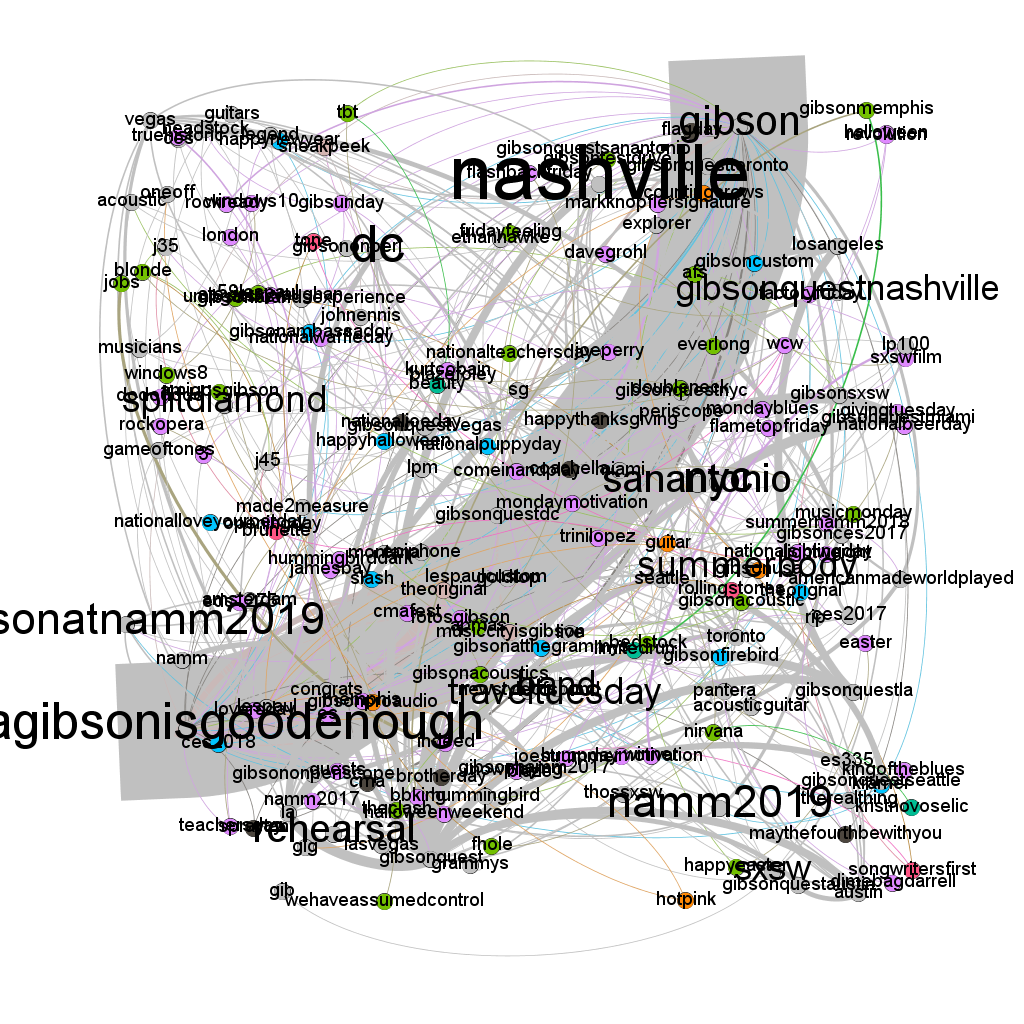

In [64]:
from IPython.display import Image
Image("data/gibson.png")

In [65]:
dff2 = dff.head(1000)

In [66]:
dff.head(20)

,handle,time,tweets,cleaned,words,score
0,Fender,5/7/2019 18:04,The Duff McKagan Deluxe Precision Bass was ins...,duff mckagan deluxe precision bass inspired ja...,"duff, mckagan, deluxe, precision, bass, inspir...",0.8074
1,Fender,5/6/2019 22:19,@RibeiroR72 We announced the winners last week...,ribeiror announced winners last week,"ribeiror, announced, winners, last, week",0.4767
2,Fender,5/6/2019 21:32,A few great photos from the opening of the Fen...,great photos opening fender exhibit museumfull...,"great, photos, opening, fender, exhibit, museu...",0.6249
3,Fender,5/6/2019 21:00,Nothing beats catching a few riffs on a Surf G...,nothing beats catching riffs surf green jaguar...,"nothing, beats, catching, riffs, surf, green, ...",0.3182
4,Fender,5/6/2019 18:31,RT @rockhall: The Hoss. @muddyofficial preferr...,rockhall hoss muddyofficial preferred guitar f...,"rockhall, hoss, muddyofficial, preferred, guit...",0.4215
5,Fender,5/5/2019 16:00,Head to the Fender website to scope out the la...,head fender website scope latest additions cal...,"head, fender, website, scope, latest, addition...",0.0000
6,Fender,5/4/2019 16:00,What vibes are you getting from this Surf Gree...,vibes getting surf green squier classic vibe j...,"vibes, getting, surf, green, squier, classic, ...",0.0000
7,Fender,5/4/2019 11:00,"So, who wants to see Mumford &amp; Sons at @al...",wants mumford sons allpointseastuk june talkin...,"wants, mumford, sons, allpointseastuk, june, t...",0.0000
8,Fender,5/3/2019 15:33,Fender at @thegreatescape will be epic and we ...,fender thegreatescape epic wait next week market,"fender, thegreatescape, epic, wait, next, week...",0.0000
9,Fender,5/3/2019 15:02,Congrats @individual6827 @guynamedfawkes @Jone...,congrats individual guynamedfawkes jonesdan de...,"congrats, individual, guynamedfawkes, jonesdan...",0.6908


In [67]:
tweets = dff2.values
len(tweets)

1000

In [68]:
hashtag_network = []
for tweet in tweets:
    data = re.sub("[^a-zA-Z0-9#]+", " ", tweet[2])
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    hashtag_network.append(hashtag)

In [69]:
hashtag_network[:10]

[[], [], [], [], [], [], [], [], [], []]

In [70]:
from itertools import combinations
cohashtags = [x for d in hashtag_network for x in combinations(d, 2)]
cohashtags[:20]

[('dyk', 'fenderplay'),
 ('internationalguitarmonth', 'fenderplay'),
 ('gameofthrones', 'forthethrone'),
 ('internationalguitarmonth', 'fenderplay'),
 ('telecaster', 'fendercustomshop'),
 ('telecaster', 'teletuesday'),
 ('fendercustomshop', 'teletuesday'),
 ('firstlook', 'strat'),
 ('throwbackthursday', 'tbt'),
 ('sxsw2019', 'fendernext'),
 ('fendernext', 'sxsw2019'),
 ('fendernext', 'sxsw2019'),
 ('fendernext', 'sxsw2019'),
 ('fendernext', 'sxsw2019'),
 ('fendernext', 'sxsw2019'),
 ('fendernext', 'sxsw2019'),
 ('fendernext', 'sxsw2019'),
 ('fendernext', 'sxsw2019'),
 ('newtoy', 'mustangbass'),
 ('newtoy', 'aubergine')]

In [71]:
outfile = open("data/cohashtag_network5.csv", "w", newline='')
w = csv.writer(outfile)
for i in cohashtags:
    w.writerow(i)    
outfile.close()

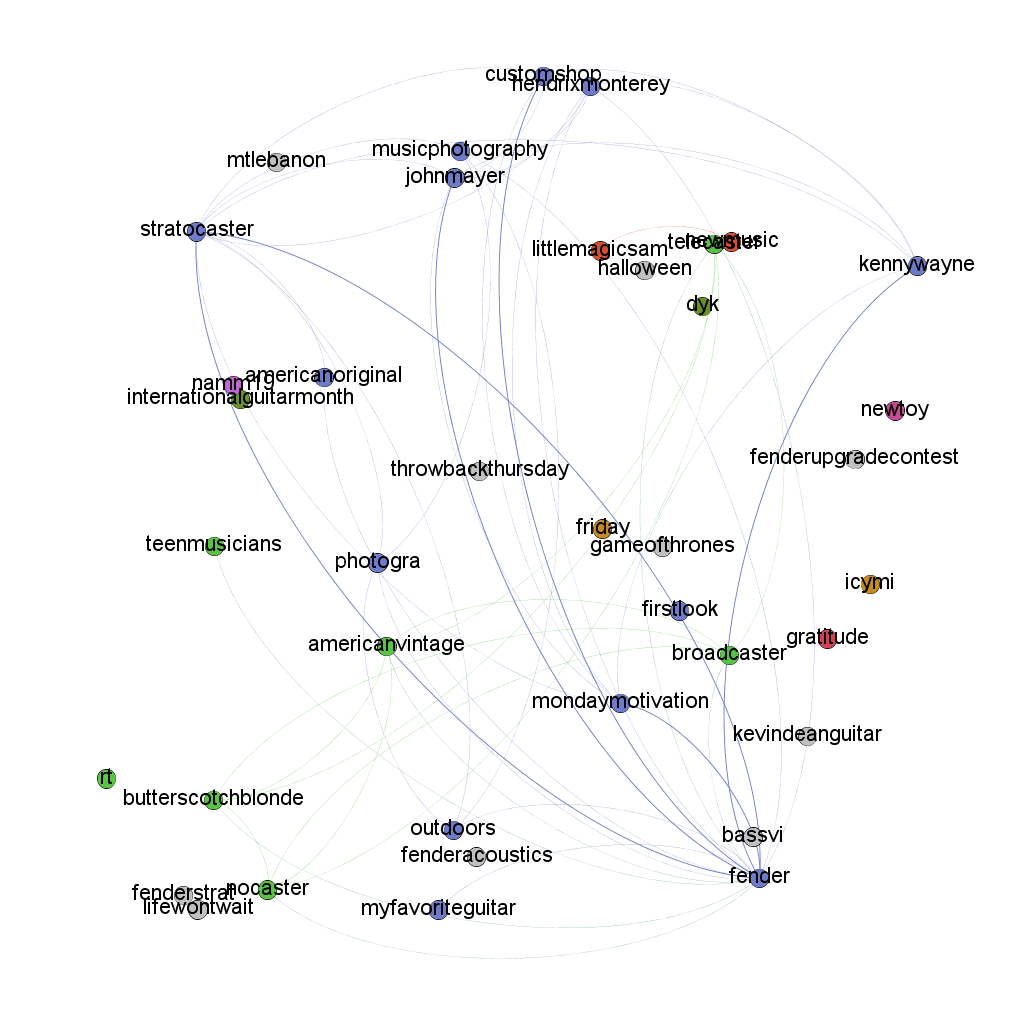

In [72]:
from IPython.display import Image
Image("data/fender.png")

# Story Telling

    After performing my anaysis of Gibson and Fender guitars I uncovered some very interesting information. The first thing that I did in My analysis was a word frequency analysis along with word clouds for each company. Analyzing tweets that the company uses for promotion and other activities. I found that Gibson mentions things like rock, les paul, gibson custom, and namm. Fender mentioned words such as happy, bass, guitar, stratocaster, and telecaster. This is good to know from a managerial perspective for one you can get an idea of topics that are frequently tweeted about by your firm and maybe find some topics that should be promoted more frequently.
    
    I then moved on to sentiment analysis. I used vader sentiment for this analysis. I found that the average sentiment of a Gibson tweet was .233 and the average score for a Fender tweet was .264. Although both scores are very close this implies that Gibson discuess slightly more negative things than Fender which is something a manger might want to know. I also used graphs to visualize distrubutions of the scores to see if there was any discrepencies both distrubtutions were very close to one antother. 
    
    After this I used topic modeling. This was to categorize the tweets for each company and determine the optimal number of topics for categoizing said tweets. Ultimatly I found that Gibson has around 12 topics that tweets can be categorized into while fender has around 10. This is important information to know becasue maybe one company is too focused on their tweets or the other is to broad. Another thing this is good for is to understand the kinds of things that the company frequently tweets about and how they are related to one another. 
    
    Finally I performed a network analysis. I used cohashtag approach and an eigenvector analysis for the images that I uploaded in this file. This can be used by a manager to better understand what topics and hastags are interrelated and maybe find some things that are interelated that is unexpected. 
    
    Overall I am proud of my analysis and I think that there is plenty of business intelligence that can be used by a manager in their decsion making process on how to more effectivly use social media.
